# Pulling & Cleaning Dataset

In [15]:
# reading in the text file as text.
with open('bible.txt', 'r', encoding="utf-8") as file:
    data = file.read()

In [16]:
#Packages for normalising the text

import nltk
import regex
import re
import pandas as pd
import warnings
import  numpy as np

warnings.filterwarnings("ignore", category=DeprecationWarning)


In [17]:
#removing the junk lines.

def remove_lines_before(text, num_lines):
    lines = text.splitlines()  # Split the string into a list of lines
    return "\n".join(lines[num_lines:])  # Join back after skipping first `num_lines` lines

def remove_lines_after(text, num_lines):
    lines = text.splitlines()  # Split the string into a list of lines
    return "\n".join(lines[:num_lines])  # Join back after skipping first `num_lines` lines

biblebefore = remove_lines_before(data, 962)
bibleafter = remove_lines_after(biblebefore, 195850) 

In [18]:
bible = bibleafter.lower()

### Listing stopwords & bible verses & chapters-which we don't need.

In [19]:
#Creating stopwords in Kikongo
    #These are all the words that I know for certain are stopwords
        #The words commented out are stopwords when by themselves, but make up parts of other words. 
        # par exemple "mona" by itself means "see", but "mona mpasi" means to feel pain.

stopwords = [
    "na",
    "ya",
    "ve",
    "nge",
    "ko",
    "yo",
    "ka",
    "mo",
    "nki",
    "wa",
    "vu",
    "yandi",
    "ye",
    "va",
    "i",
    "kia",
    "titi",
    "vo",
    "bika",
    "kati",
    "kot",
    "yeti",
    "keti",
    "nz",
    "yeli",
    "ak",
    "wo",
    "mona",
    "tala",
    "mu",
    "una",
    "aku",
    "nuni",
    "kadi",
    "yoyo",
    "kwa",
    "kot",
    "si",
    "mo",
    "wau",
    "toa",
    "bo",
    "wamona",
    "ntangu",
    "konso",
    "kansi",
    "kwiza",
    "lumbu",
    "bobo",
    "yau",
    "u",
    "noa",
    "a",
    "veb",
    "mb",
    "bwabu",
    "buna",
    "ami",
    "yayi",
    "ak",
    "li",
    

]

In [20]:
#creating list of bible chapter shorthand 

chapters = [
     "am",
    "dan",
    "eb",
    "ef",
    "esala",
    "est",
    "file",
    "fili",
    "hab",
    "hang",
     "loa",
    "kapu",
    "kap",
    "yea",
    "xap",
    "xapu",
    "la",
    "moae",
    "xaptj",
    "lmnb",
    "hos",
    "1 kol",
    "kol",
    "2 kol",
    "kolo",
    "loma",
    "luk",
    "lumb",
    "1 lus",
    "2 lus",
    "lus",
    "luti",
    "mal",
    "malaki",
    "man",
    "mat",
    "mav",
    "mika",
    "1 mose",
    "2 mose",
    "3 mose",
    "4 mose",
    "5 mose",
    "mose",
    "mpovi",
    "nah",
    "neh",
    "ngal",
    "ngai",
    "nk",
    "nk sol",
    "nkong",
    "nkoug",
    "1 nt",
    "2 nt",
    "nt",
    "nzai",
    "nzal",
    "ob",
    "1 pet",
    "2 pet",
    "pet",
    "sak",
    "1 sam",
    "2 sam",
    "sef",
    "1 tes",
    "2 tes",
    "tes",
    "1 tim",
    "2 tim",
    "tim",
    "tit",
    "yak",
    "yeh",
    "yel",
    "yes",
    "yoa",
    "1 yoa",
    "2 yoa",
    "3 yoa",
    "yobi",
    "yoeli",
    "yona",
    "yos",
    "yuda",
    "zing",
    "kapj",
    "kaptj",
    "kaptt",
    "kapt",
    "kafu",
    "xapxt",
    "xaxpt"
]

In [21]:
#remove verses in the middle with regex

def remove_stopwords_verses(nvbible):
    """
    Removes stopwords(flawed list) and bible verses that are shorthand on the page
    """


    nvbible = re.sub(r'\S*\s*:\s*\S*', '', nvbible)    #removing text around colons
 
    nvbible = re.sub(r'\b[a-zA-Z]\b', '', nvbible)   #removing single letters



    chptrs_regex = r'\b(?:' + '|'.join(chapters) + r')\b'  #removing chapters shorthand
    nvbible = re.sub(chptrs_regex, '', nvbible)

    chptrs_regex = r'\b(?:' + '|'.join(stopwords    ) + r')\b'       #removing stopwords - FLAWED LIST
    nvbible = re.sub(chptrs_regex, '', nvbible)


    nvbible = re.sub(r'\d+', '', nvbible)        #removing numbers

    nvbible = re.sub(r'[^\w\s]', '', nvbible)    #removing all punctuation
    
    return nvbible

In [22]:
biblia = remove_stopwords_verses(bible)

# Dividing into separate corpora

In [23]:
#function because I can

def create_corpus(corpus, start, end):  
    """
    Creates a corpus for each book of the bible
    """
    
    return corpus[start:end]

In [24]:
#Old Testament
genesisstring = create_corpus(biblia, 3,8824)
exodusstring = create_corpus(biblia, 8826, 16212)
leviticusstring = create_corpus(biblia, 16214, 21576)
numbersstring = create_corpus(biblia, 21578, 28809)
deuteronomystring = create_corpus(biblia, 28811, 35431)
joshuastring = create_corpus(biblia, 35437, 39650)
judgesstring = create_corpus(biblia, 39656, 43641)
ruthstring = create_corpus(biblia, 43649, 44213)
samuel1string = create_corpus(biblia, 44221, 49741)
samuel2string = create_corpus(biblia, 49747, 54289)
kings1string = create_corpus(biblia, 54292, 59627)
kings2string = create_corpus(biblia, 59630, 64738)
chronicles1string = create_corpus(biblia, 64741, 69828)
chronicles2string = create_corpus(biblia, 69831, 75727)
ezrastring = create_corpus(biblia, 75735, 77408)
nehemiahstring = create_corpus(biblia, 77412, 79940)
estherstring = create_corpus(biblia, 79955, 81197)
jobstring = create_corpus(biblia, 81205, 86685)
psalmsstring = create_corpus(biblia, 86688, 100128)
proverbsstring = create_corpus(biblia, 100132,  104888)
ecclesiastesstring = create_corpus(biblia, 104906, 106625)
songsofsolomonstring = create_corpus(biblia, 106628, 107229)
isaiahstring = create_corpus(biblia, 107234, 116511)
jeremiahstring = create_corpus(biblia, 116516, 126108)
lamentationsstring = create_corpus(biblia, 126121, 127045)
ezekielstring = create_corpus(biblia, 127053, 135765)
danielstring = create_corpus(biblia, 135768, 138434)
hoseastring = create_corpus(biblia, 138440, 139824)
joelstring = create_corpus(biblia, 139832, 140322)
amosstring = create_corpus(biblia, 140330, 141392)
obadiahstring = create_corpus(biblia, 141395, 141558)
jonahstring = create_corpus(biblia, 141569, 141871)
micahstring = create_corpus(biblia, 141879, 142704)
nahumstring = create_corpus(biblia, 142707, 143054)
habakkukstring = create_corpus(biblia, 143068, 143373)
zephaniahstring = create_corpus(biblia, 143377, 143848)
haggaistring = create_corpus(biblia, 143854, 144100)
zachariahstring = create_corpus(biblia, 144110, 145665)
malachistring = create_corpus(biblia, 145685, 146115)

#New Testament
matthewstring = create_corpus(biblia, 146146, 152084)
markstring = create_corpus(biblia, 152092, 155713)
lukestring = create_corpus(biblia, 155721, 161770)
johnstring = create_corpus(biblia, 161788, 166435)
actsstring = create_corpus(biblia, 166443, 172098)
romansstring = create_corpus(biblia, 172109, 174710)
corinthians1string = create_corpus(biblia, 174722, 177228)
corinthians2string = create_corpus(biblia, 177238, 178857)
galatiansstring = create_corpus(biblia, 178865, 179718)
ephesiansstring = create_corpus(biblia, 179726, 180662)
philippiansstring = create_corpus(biblia, 180670, 181319)
colossiansstring = create_corpus(biblia, 181329, 181914)
thessalonians1string = create_corpus(biblia, 181934, 182488)
thessalonians2string = create_corpus(biblia, 182498, 182790)
timothy1string = create_corpus(biblia, 182802, 183501)
timothy2string = create_corpus(biblia, 183514, 184019)
titusstring = create_corpus(biblia, 184027, 184345)
philemonstring = create_corpus(biblia, 184350, 184417)
hebrewsstring = create_corpus(biblia, 184422, 186299)
jacobstring = create_corpus(biblia, 186306, 186957)
peter1string = create_corpus(biblia, 186967, 187704)
peter2string = create_corpus(biblia, 187724, 188127)
john1string = create_corpus(biblia, 188135, 188825)
john2string = create_corpus(biblia, 188830, 188908)
john3string = create_corpus(biblia, 188914, 188986)
judestring = create_corpus(biblia, 189002, 189174)
revelationstring = create_corpus(biblia, 189184, 192275)

### Tokenising

In [25]:
#Making a tokenising function
def alphabetise(g):
    """
    Normalises the text by removing extra spaces and splitting into tokens.
    """
     #Turns all whitespace into a single space
    t = re.sub(r'\s+', ' ', g).strip()
    #Tokenises by splitting on this single space
    tokens = t.split()
    
    
    return tokens

In [26]:
#Tokenising and final cleaning the whole corpus
c_before = alphabetise(biblia)

#Tokenising and final cleaning the books, now individual corpora
genesis = alphabetise(genesisstring)
exodus = alphabetise(exodusstring)
leviticus = alphabetise(leviticusstring)
numbers = alphabetise(numbersstring)
deuteronomy = alphabetise(deuteronomystring)
joshua = alphabetise(joshuastring)
judges = alphabetise(judgesstring)
ruth = alphabetise(ruthstring)
samuel1 = alphabetise(samuel1string)
samuel2 = alphabetise(samuel2string)
kings1 = alphabetise(kings1string)
kings2 = alphabetise(kings2string)
chronicles1 = alphabetise(chronicles1string)
chronicles2 = alphabetise(chronicles2string)

ezra = alphabetise(ezrastring)
nehemiah = alphabetise(nehemiahstring)
esther = alphabetise(estherstring)
job = alphabetise(jobstring)
psalms = alphabetise(psalmsstring)
proverbs = alphabetise(proverbsstring)
ecclesiastes = alphabetise(ecclesiastesstring)
songsofsolomon = alphabetise(songsofsolomonstring)
isaiah = alphabetise(isaiahstring)
jeremiah = alphabetise(jeremiahstring)
lamentations = alphabetise(lamentationsstring)
ezekiel = alphabetise(ezekielstring)
daniel = alphabetise(danielstring)
hosea = alphabetise(hoseastring)
joel = alphabetise(joelstring)
amos = alphabetise(amosstring)
obadiah = alphabetise(obadiahstring)
jonah = alphabetise(jonahstring)
micah = alphabetise(micahstring)
nahum = alphabetise(nahumstring)
habakkuk = alphabetise(habakkukstring)
zephaniah = alphabetise(zephaniahstring)
haggai = alphabetise(haggaistring)
zachariah = alphabetise(zachariahstring)
malachi = alphabetise(malachistring)
matthew = alphabetise(matthewstring)
mark = alphabetise(markstring)
luke = alphabetise(lukestring)
john = alphabetise(johnstring)
acts = alphabetise(actsstring)
romans = alphabetise(romansstring)
corinthians1 = alphabetise(corinthians1string)
corinthians2 = alphabetise(corinthians2string)
galatians = alphabetise(galatiansstring)
ephesians = alphabetise(ephesiansstring)
philippians = alphabetise(philippiansstring)
colossians = alphabetise(colossiansstring)
thessalonians1 = alphabetise(thessalonians1string)
thessalonians2 = alphabetise(thessalonians2string)
timothy1 = alphabetise(timothy1string)
timothy2 = alphabetise(timothy2string)
titus = alphabetise(titusstring)
philemon = alphabetise(philemonstring)
hebrews = alphabetise(hebrewsstring)
jacob = alphabetise(jacobstring)
peter1 = alphabetise(peter1string)
peter2 = alphabetise(peter2string)
john1 = alphabetise(john1string)
john2 = alphabetise(john2string)
john3 = alphabetise(john3string)
jude = alphabetise(judestring)
revelation = alphabetise(revelationstring)

# Attempting to find words incorrectly read into the document

In [27]:
#This function checks for words that do not fit the language's pattern, and removes them. 

def check_for_incorrects(corpus):
    """
        Filters through the tokens and checks patterns for words that don't exist in Kikongo Kituba
        1) all vowel pairs or higher
        2) ANY words with a consonant pair that isn't used in muana kituba
        3) more than 2 consecutive consonants
        4 ) words with the letter x
    """
    legal_pairs = {'mb', 'ng', 'nt', 'nz', 'nl', 'kw', 'bw', 'ns', 'nk', 'nd', 'fw', 'nf', 'mf', 'mp', 'mw', 'nb'} #these consonant pairs exist within kituba
    
    illegal_vowels = {"aa", "ee", "ii", "oo", "uu"} #never any repeated vowels
    consonants = "bcdfghjklmnpqrstvwyz" #legal consonants
    
    filtered = []   #list to hold the words which are legal
    
    #for loop to iterate through the corpus
    for word in corpus:
        #exclude words with illegal vowel pairs
        if any(vp in word for vp in illegal_vowels):
            continue
        #exclude words with more than 2 consecutive vowels. doesn't exist in Kikongo.
        if re.search(r'[aeiou]{3,}', word):
            continue
        #exclude words with more than 2 consecutive consonants. doesn't exist in Kikongo.
        if re.search(r'[bcdfghjklmnpqrstvwyz]{3,}', word):
            continue

        #exclude words containing 'x' character. Doesn't exist in most Kikongo dialects.
        if 'x' in word:
            continue
        
        #exclude ALL words with illegal consonant pairs
        legal = False #has a legal
        illegal = False #has an illegal
        
        # for loop to find ANY word with ILLEGAL consonant pair
        for c in range(len(word) - 1): #looping through each character + consecutive character
            c1, c2 = word[c], word[c + 1] #consonant pair
            #if the first character is a consonant and the second character is a consonant
            if c1 in consonants and c2 in consonants:
                double_c = c1 + c2 #creating pair for each word that loops through
                
                if double_c in legal_pairs: 
                    legal = True

                else:
                    illegal = True
                    
        if legal and not illegal:
            filtered.append(word)    #adding the word to the filtered list if it is legal
            
            
    return filtered

In [28]:

#Printing total number of words in the corpus
print("The number of words in the corpus prior to filtering for incorrect words is: ", len(c_before))



#Run the function to check for incorrectly read words
corrected_tokenised_corpus = check_for_incorrects(c_before)

#Printing out the results
print("The number of correctly read words in the corpus is: ", len(corrected_tokenised_corpus))

percentage_of_words_corrected = (len(c_before) - len(corrected_tokenised_corpus)) / len(c_before) * 100
print(f"Approximately {percentage_of_words_corrected:.2f}% of words were incorrectly read in the corpus.") 
print("This is an EXTREMELY high number. However, scrolling through the list-it is significantly cleaner.")

The number of words in the corpus prior to filtering for incorrect words is:  471787
The number of correctly read words in the corpus is:  197243
Approximately 58.19% of words were incorrectly read in the corpus.
This is an EXTREMELY high number. However, scrolling through the list-it is significantly cleaner.


In [29]:
#fixing the books
genesis = check_for_incorrects(genesis)
exodus = check_for_incorrects(exodus)
leviticus = check_for_incorrects(leviticus)
numbers = check_for_incorrects(numbers)
deuteronomy = check_for_incorrects(deuteronomy)
joshua = check_for_incorrects(joshua)
judges = check_for_incorrects(judges)
ruth = check_for_incorrects(ruth)
samuel1 = check_for_incorrects(samuel1)
samuel2 = check_for_incorrects(samuel2)
kings1 = check_for_incorrects(kings1)
kings2 = check_for_incorrects(kings2)
chronicles1 = check_for_incorrects(chronicles1)
chronicles2 = check_for_incorrects(chronicles2)
ezra = check_for_incorrects(ezra)
nehemiah = check_for_incorrects(nehemiah)
esther = check_for_incorrects(esther)
job = check_for_incorrects(job)
psalms = check_for_incorrects(psalms)
proverbs = check_for_incorrects(proverbs)
ecclesiastes = check_for_incorrects(ecclesiastes)
songsofsolomon = check_for_incorrects(songsofsolomon)
isaiah = check_for_incorrects(isaiah)
jeremiah = check_for_incorrects(jeremiah)
lamentations = check_for_incorrects(lamentations)
ezekiel = check_for_incorrects(ezekiel)
daniel = check_for_incorrects(daniel)
hosea = check_for_incorrects(hosea)
joel = check_for_incorrects(joel)
amos = check_for_incorrects(amos)
obadiah = check_for_incorrects(obadiah)
jonah = check_for_incorrects(jonah)
micah = check_for_incorrects(micah)
nahum = check_for_incorrects(nahum)
habakkuk = check_for_incorrects(habakkuk)
zephaniah = check_for_incorrects(zephaniah)
haggai = check_for_incorrects(haggai)
zachariah = check_for_incorrects(zachariah)
malachi = check_for_incorrects(malachi)
matthew = check_for_incorrects(matthew)
mark = check_for_incorrects(mark)
luke = check_for_incorrects(luke)
john = check_for_incorrects(john)
acts = check_for_incorrects(acts)
romans = check_for_incorrects(romans)
corinthians1 = check_for_incorrects(corinthians1)
corinthians2 = check_for_incorrects(corinthians2)
galatians = check_for_incorrects(galatians)
ephesians = check_for_incorrects(ephesians)
philippians = check_for_incorrects(philippians)
colossians = check_for_incorrects(colossians)
thessalonians1 = check_for_incorrects(thessalonians1)
thessalonians2 = check_for_incorrects(thessalonians2)
timothy1 = check_for_incorrects(timothy1)
timothy2 = check_for_incorrects(timothy2)
titus = check_for_incorrects(titus)
philemon = check_for_incorrects(philemon)
hebrews = check_for_incorrects(hebrews)
jacob = check_for_incorrects(jacob)
peter1 = check_for_incorrects(peter1)
peter2 = check_for_incorrects(peter2)
john1 = check_for_incorrects(john1)
john2 = check_for_incorrects(john2)
john3 = check_for_incorrects(john3)
jude = check_for_incorrects(jude)
revelation = check_for_incorrects(revelation)


# Second list of stopwords based on later analysis

I created this by manually scanning the text, repeatedly checking frequency distributions, looking at my physical dictionary / online ones, and finally consulting native speakers for verification.

Note: some of these are NOT actual stopwords - they are either commonly misread words by OCR, or words that are conjugated together with stopwords. for example:

babonsono -> conjugated bonso, which functions as a conjugation a bit like the word 'as' in English

The creation of the stopwords list is an ongoing project. The stopwords list also will vary some amount between dialects/sublanguages.


In [30]:
def remove_stopwords_verses2(tokens):
    #New stopwords list added after further examination of the corpora
    stopwords2 = [
        "bu",
        "dia",
        "ntoto",
        "lea"
        "ku",
        "ba",
        "nani",
        "bisi",
        "nseke",
        "bonso",
        "kala",
        "wakala",
        "mosi",
        "ma",
        "vwa",
        "sa",
        "andi",
        "mpe",
        "mono",
        "miakala",
        "ku",
        "bami",
        "kidi",
        "sandi",
        "yina",
        "ba",
        "ma",
        "bonso",
        "andi",
        "nsi",
        "ngeye",
        "mpe",
        "ngina",
        "biabionsono",
        "babonsono",
        "nza",
        "mbi",
        "nta",
        "ngu",
        "mpa",
        "ngi",
        "nku",
        "mbu",
        "mwan",
        "nsa",
        "nzo",
        "nga",
        "iamb",
        "biabionsono",
        "bonso",
    ]
    return [word for word in tokens if word not in stopwords2]

In [31]:
#running it through the corpus
corrected_tokenised_corpus = remove_stopwords_verses2(corrected_tokenised_corpus)

In [32]:
c = corrected_tokenised_corpus

In [33]:
#removing stopwords from the books
genesis = remove_stopwords_verses2(genesis)
exodus = remove_stopwords_verses2(exodus)
leviticus = remove_stopwords_verses2(leviticus)
numbers = remove_stopwords_verses2(numbers)
deuteronomy = remove_stopwords_verses2(deuteronomy)
joshua = remove_stopwords_verses2(joshua)
chronicles1 = remove_stopwords_verses2(chronicles1)
chronicles2 = remove_stopwords_verses2(chronicles2)
ezra = remove_stopwords_verses2(ezra)
nehemiah = remove_stopwords_verses2(nehemiah)
esther = remove_stopwords_verses2(esther)
job = remove_stopwords_verses2(job)
psalms = remove_stopwords_verses2(psalms)
proverbs = remove_stopwords_verses2(proverbs)
ecclesiastes = remove_stopwords_verses2(ecclesiastes)
songsofsolomon = remove_stopwords_verses2(songsofsolomon)
isaiah = remove_stopwords_verses2(isaiah)
jeremiah = remove_stopwords_verses2(jeremiah)
lamentations = remove_stopwords_verses2(lamentations)
ezekiel = remove_stopwords_verses2(ezekiel)
daniel = remove_stopwords_verses2(daniel)
hosea = remove_stopwords_verses2(hosea)
joel = remove_stopwords_verses2(joel)
amos = remove_stopwords_verses2(amos)
obadiah = remove_stopwords_verses2(obadiah)

jonah = remove_stopwords_verses2(jonah)
micah = remove_stopwords_verses2(micah)
nahum = remove_stopwords_verses2(nahum)
habakkuk = remove_stopwords_verses2(habakkuk)
zephaniah = remove_stopwords_verses2(zephaniah)
haggai = remove_stopwords_verses2(haggai)
zachariah = remove_stopwords_verses2(zachariah)
malachi = remove_stopwords_verses2(malachi)
matthew = remove_stopwords_verses2(matthew)
mark = remove_stopwords_verses2(mark)
luke = remove_stopwords_verses2(luke)
john = remove_stopwords_verses2(john)
acts = remove_stopwords_verses2(acts)
romans = remove_stopwords_verses2(romans)
corinthians1 = remove_stopwords_verses2(corinthians1)
corinthians2 = remove_stopwords_verses2(corinthians2)
galatians = remove_stopwords_verses2(galatians)
ephesians = remove_stopwords_verses2(ephesians)
philippians = remove_stopwords_verses2(philippians)
colossians = remove_stopwords_verses2(colossians)
thessalonians1 = remove_stopwords_verses2(thessalonians1)
thessalonians2 = remove_stopwords_verses2(thessalonians2)
timothy1 = remove_stopwords_verses2(timothy1)
timothy2 = remove_stopwords_verses2(timothy2)
titus = remove_stopwords_verses2(titus)
philemon = remove_stopwords_verses2(philemon)
hebrews = remove_stopwords_verses2(hebrews)
jacob = remove_stopwords_verses2(jacob)
peter1 = remove_stopwords_verses2(peter1)
peter2 = remove_stopwords_verses2(peter2)
john1 = remove_stopwords_verses2(john1)
john2 = remove_stopwords_verses2(john2)
john3 = remove_stopwords_verses2(john3)
jude = remove_stopwords_verses2(jude)
revelation = remove_stopwords_verses2(revelation)

Create dictionaries


In [34]:
from collections import Counter

#Creating a dictionary function that just does it faster
def create_dictionary(corpus):
    """
    Creates a dictionary for the whole corpus
    """
    #creating a Counter object to count occurrences of each word
    word_counts = Counter(corpus)
    
    #converting it to a dictionary
    word_dict = dict(word_counts)
    
    return word_dict


#Creating a dictionary for each book of the bible
genesis_dict = create_dictionary(genesis)
exodus_dict = create_dictionary(exodus)
leviticus_dict = create_dictionary(leviticus)
numbers_dict = create_dictionary(numbers)
deuteronomy_dict = create_dictionary(deuteronomy)
joshua_dict = create_dictionary(joshua)
judges_dict = create_dictionary(judges)
ruth_dict = create_dictionary(ruth)
samuel1_dict = create_dictionary(samuel1)
samuel2_dict = create_dictionary(samuel2)
kings1_dict = create_dictionary(kings1)
kings2_dict = create_dictionary(kings2)
chronicles1_dict = create_dictionary(chronicles1)
chronicles2_dict = create_dictionary(chronicles2)
ezra_dict = create_dictionary(ezra)
nehemiah_dict = create_dictionary(nehemiah)
esther_dict = create_dictionary(esther)
job_dict = create_dictionary(job)
psalms_dict = create_dictionary(psalms)
proverbs_dict = create_dictionary(proverbs)
ecclesiastes_dict = create_dictionary(ecclesiastes)
songsofsolomon_dict = create_dictionary(songsofsolomon)
isaiah_dict = create_dictionary(isaiah)
jeremiah_dict = create_dictionary(jeremiah)
lamentations_dict = create_dictionary(lamentations)
ezekiel_dict = create_dictionary(ezekiel)
daniel_dict = create_dictionary(daniel)
hosea_dict = create_dictionary(hosea)
joel_dict = create_dictionary(joel)
amos_dict = create_dictionary(amos)
obadiah_dict = create_dictionary(obadiah)
jonah_dict = create_dictionary(jonah)
micah_dict = create_dictionary(micah)
nahum_dict = create_dictionary(nahum)
habakkuk_dict = create_dictionary(habakkuk)
zephaniah_dict = create_dictionary(zephaniah)
haggai_dict = create_dictionary(haggai)
zachariah_dict = create_dictionary(zachariah)
malachi_dict = create_dictionary(malachi)
matthew_dict = create_dictionary(matthew)
mark_dict = create_dictionary(mark)
luke_dict = create_dictionary(luke)
john_dict = create_dictionary(john)
acts_dict = create_dictionary(acts)
hebrews_dict = create_dictionary(hebrews)
jacob_dict = create_dictionary(jacob)
peter1_dict = create_dictionary(peter1)
peter2_dict = create_dictionary(peter2)
john1_dict = create_dictionary(john1)
john2_dict = create_dictionary(john2)
john3_dict = create_dictionary(john3)
jude_dict = create_dictionary(jude)
revelation_dict = create_dictionary(revelation)                           

# Summary Statistics

In [35]:
from nltk.probability import FreqDist

#stats on unique words
print("There are", len(corrected_tokenised_corpus), "total words in the whole corpus")


total_type_of_tokens = len(set(corrected_tokenised_corpus))
print("There are", total_type_of_tokens, "unique words in the whole corpus")

percent_unique = (total_type_of_tokens / len(corrected_tokenised_corpus)) * 100
print(f"Only {percent_unique:.2f}% of words are unique.")


#hapaxes-this gives me an idea of how well I did removing the incorrect words. 
#there was definitely a lot of junk read in, likely due to the OCR process having difficulties with the font-it is PDF scanned of a 120yo ink book.
fdist = FreqDist(corrected_tokenised_corpus)
hapaxes = fdist.hapaxes()
print(f"Found {len(hapaxes)} hapax words:")
print(hapaxes)
hapaxes = (len(hapaxes) / len(corrected_tokenised_corpus)) * 100
print(f"{hapaxes:.2f}% of words are hapaxes.")

#printing the most common words
word_freq = Counter(corrected_tokenised_corpus)
most_common = word_freq.most_common(10)
print("The most common words in the corpus are:")
for word, freq in most_common:
    print(f"{word}: {freq}")


There are 168961 total words in the whole corpus
There are 22672 unique words in the whole corpus
Only 13.42% of words are unique.
Found 13699 hapax words:
['ngenesi', 'luyalungu', 'luavambisa', 'yalungunu', 'luaminlangu', 'diavambisa', 'kwakuke', 'kitufwana', 'mionsonomibutangabanabena', 'kavundila', 'wafunduka', 'ukawumba', 'yavanganta', 'wantulamu', 'kansinti', 'iambi', 'kinso', 'kikubonga', 'wabongolo', 'mwavovele', 'mabakanga', 'uikembi', 'umpeni', 'yimbebi', 'udimbidi', 'mankazi', 'miankanda', 'mpumunu', 'zankakabu', 'kiayindalala', 'kiyindalele', 'kwaman', 'mpena', 'nadimbieti', 'mazenzila', 'zingina', 'wankubidi', 'mazenzi', 'kiantabudulu', 'butisanga', 'wantomene', 'nkandasinsi', 'basemwa', 'kenanl', 'ntomona', 'kutubomba', 'bantoko', 'bayangama', 'zanzalanga', 'ngolokele', 'ngofeli', 'aniangu', 'bidiwanga', 'nzikila', 'kukibongila', 'nginanokisa', 'biyavanga', 'wambindikila', 'yayangama', 'fiamwela', 'zansina', 'luankunzu', 'nlangit', 'funanavantoto', 'nzalanga', 'yikatonda',

# Analysing The Top 5 Books of The Bible

<Axes: title={'center': 'Top Ten Words in Genesis'}, xlabel='Samples', ylabel='Counts'>

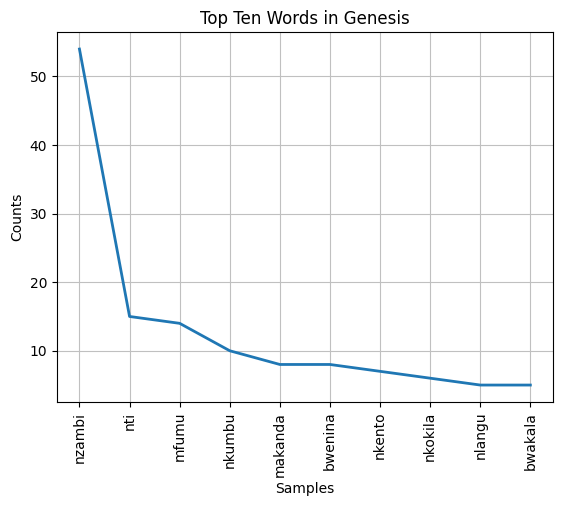

In [36]:
genesis_freq = nltk.FreqDist(genesis)
genesis_freq.plot(10, title = "Top Ten Words in Genesis")

<Axes: title={'center': 'Top Ten Words in Exodus'}, xlabel='Samples', ylabel='Counts'>

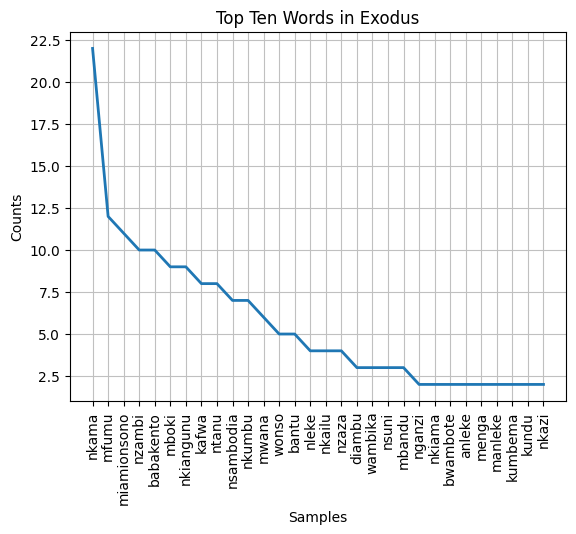

In [ ]:
exodus_freq = nltk.FreqDist(exodus)
exodus_freq.plot(10, title = "Top Ten Words in Exodus")

<Axes: title={'center': 'Top Ten Words in Revelation'}, xlabel='Samples', ylabel='Counts'>

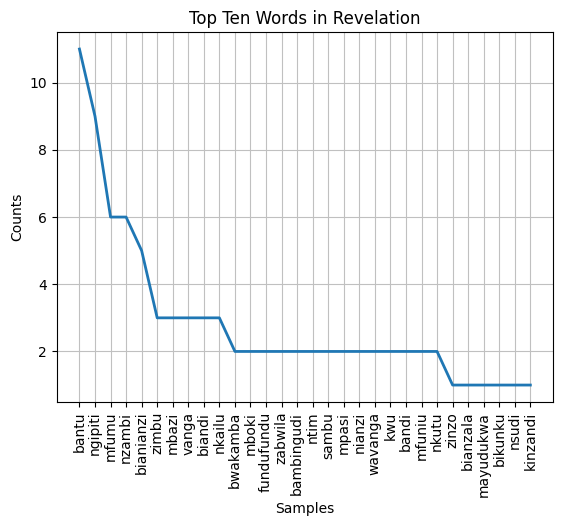

In [ ]:
revelation_freq = nltk.FreqDist(revelation)
revelation_freq.plot(10, title = "Top Ten Words in Revelation")

<Axes: title={'center': 'Top Ten Words in Psalms'}, xlabel='Samples', ylabel='Counts'>

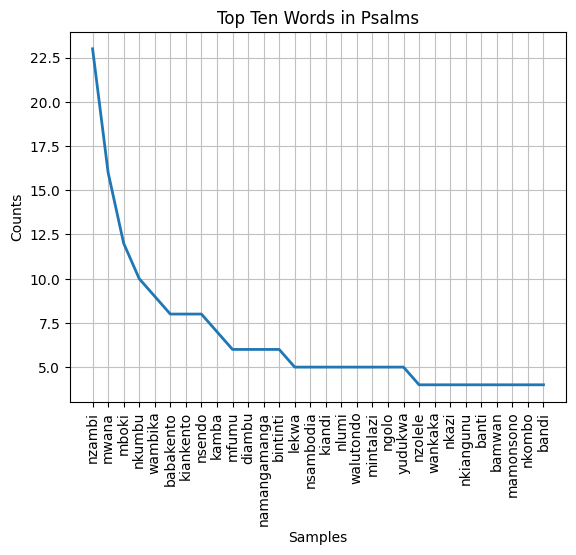

In [ ]:
psalms_freq = nltk.FreqDist(psalms)
psalms_freq.plot(10, title = "Top Ten Words in Psalms")

<Axes: title={'center': 'Top Ten Words in Matthew'}, xlabel='Samples', ylabel='Counts'>

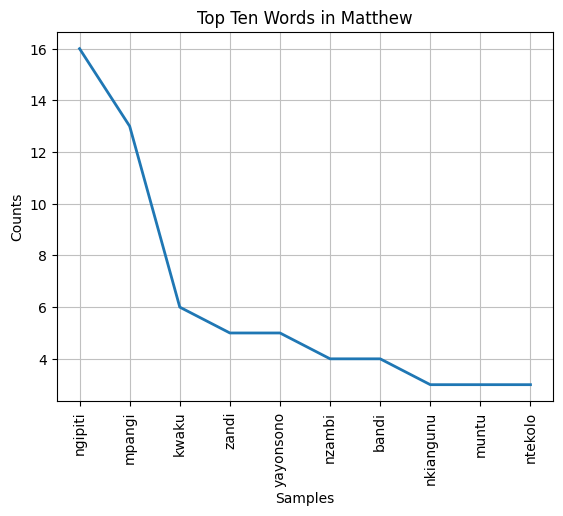

In [40]:
matthew_freq =nltk.FreqDist(matthew)
matthew_freq.plot(10, title = "Top Ten Words in Matthew")

<Axes: title={'center': 'Top Ten Words in Book of John'}, xlabel='Samples', ylabel='Counts'>

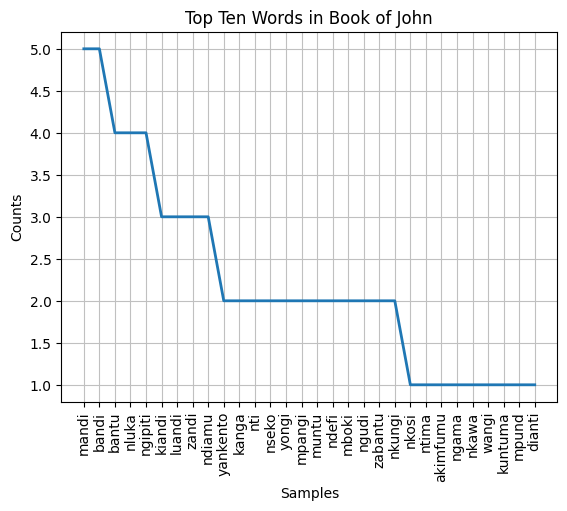

In [ ]:
john_freq = nltk.FreqDist(john)
john_freq.plot(10, title = "Top Ten Words in Book of John")

<Axes: title={'center': 'Top Ten Words in Acts'}, xlabel='Samples', ylabel='Counts'>

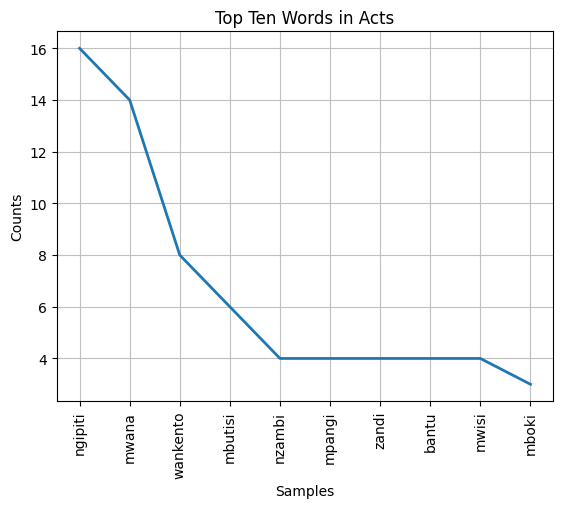

In [42]:
acts_freq = nltk.FreqDist(acts)
acts_freq.plot(10, title = "Top Ten Words in Acts")

<Axes: title={'center': 'Top Ten Words in Proverbs'}, xlabel='Samples', ylabel='Counts'>

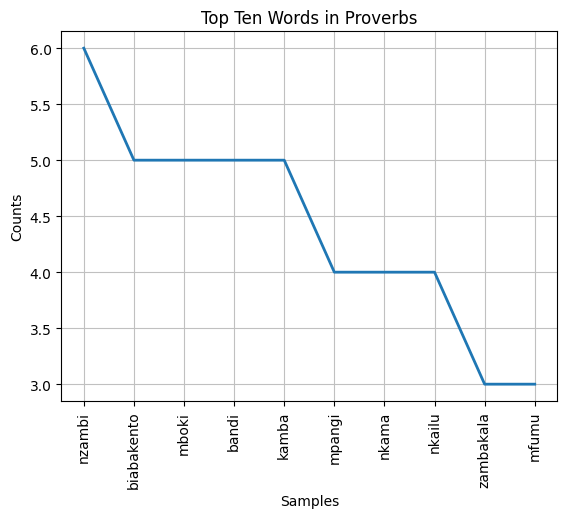

In [43]:
proverbs_freq = nltk.FreqDist(proverbs)
proverbs_freq.plot(10, title = "Top Ten Words in Proverbs")

### As visible, more preprocessing methods need to be created. 'babakento', 'yankento' 'kiankento' all have the root word 'nkento' which means "woman". If I created a stemmer, this work would be a lot better.

# Word Clouds

In [44]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

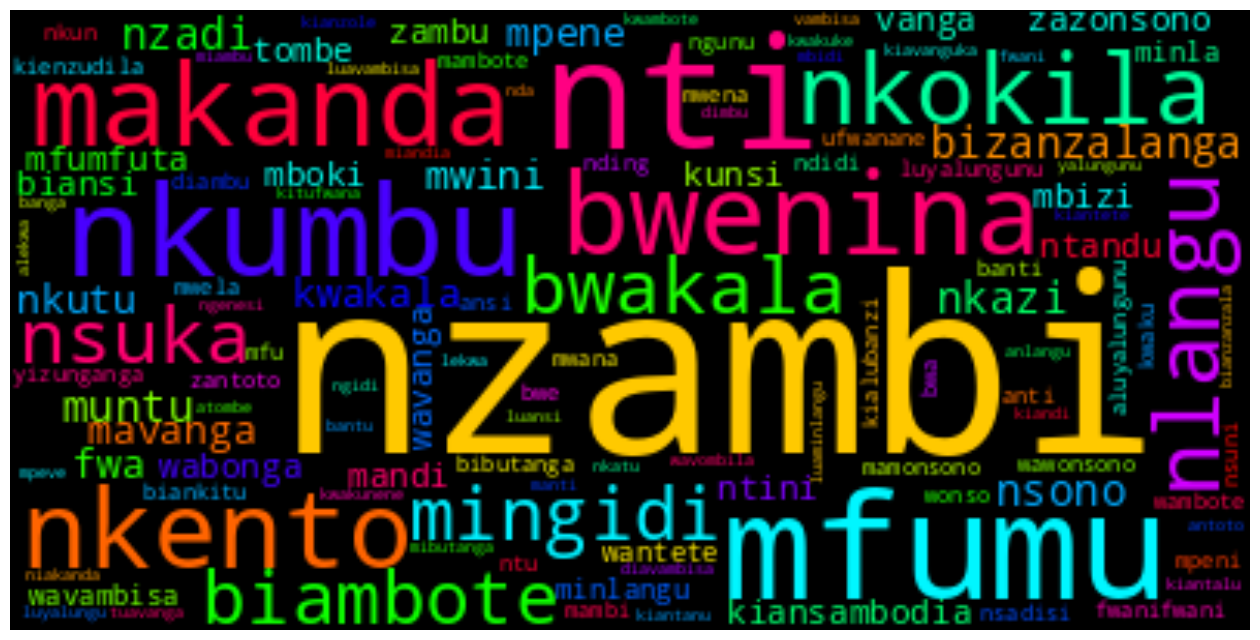

In [45]:
#Genesis word cloud
cloud = WordCloud(max_font_size=80,colormap="hsv").generate_from_frequencies(genesis_dict)
plt.figure(figsize=(16,12))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

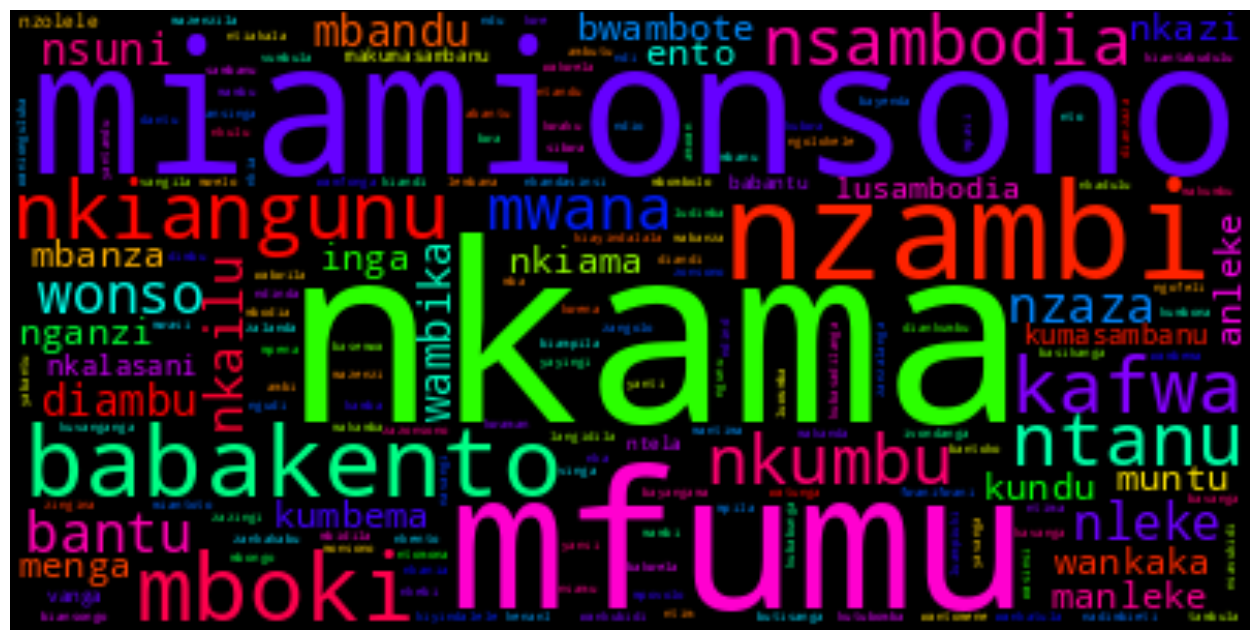

In [46]:
#Exodus word cloud
cloud = WordCloud(max_font_size=80,colormap="hsv").generate_from_frequencies(exodus_dict)
plt.figure(figsize=(16,12))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

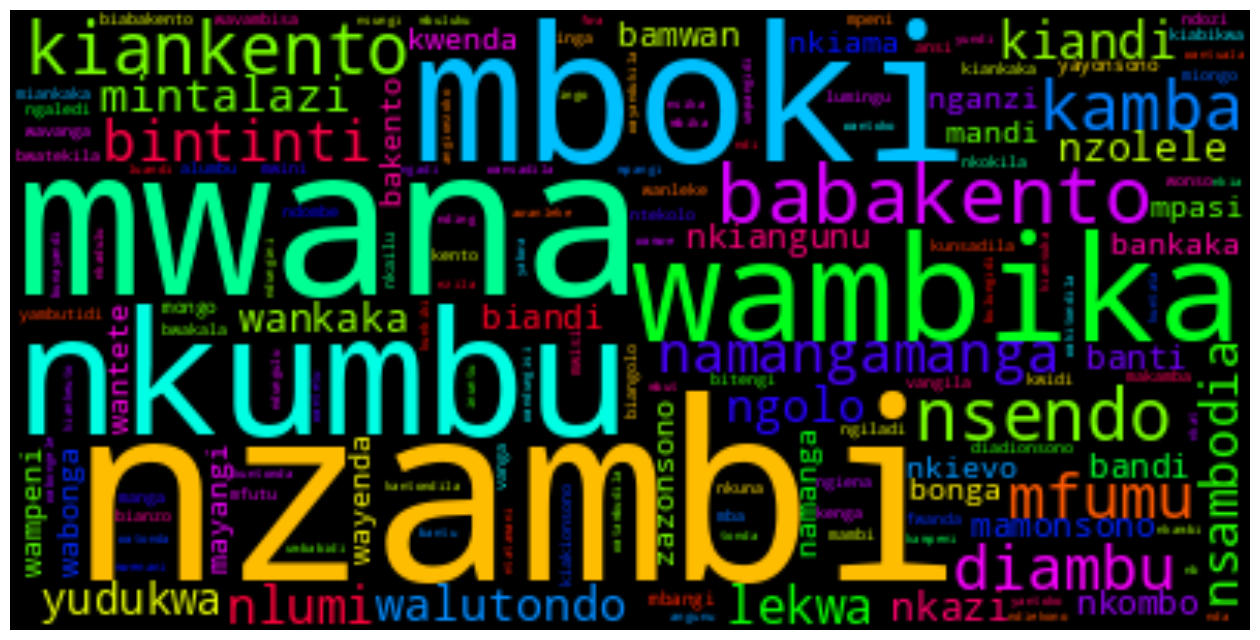

In [47]:
#Psalms word cloud
cloud = WordCloud(max_font_size=80,colormap="hsv").generate_from_frequencies(psalms_dict)
plt.figure(figsize=(16,12))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

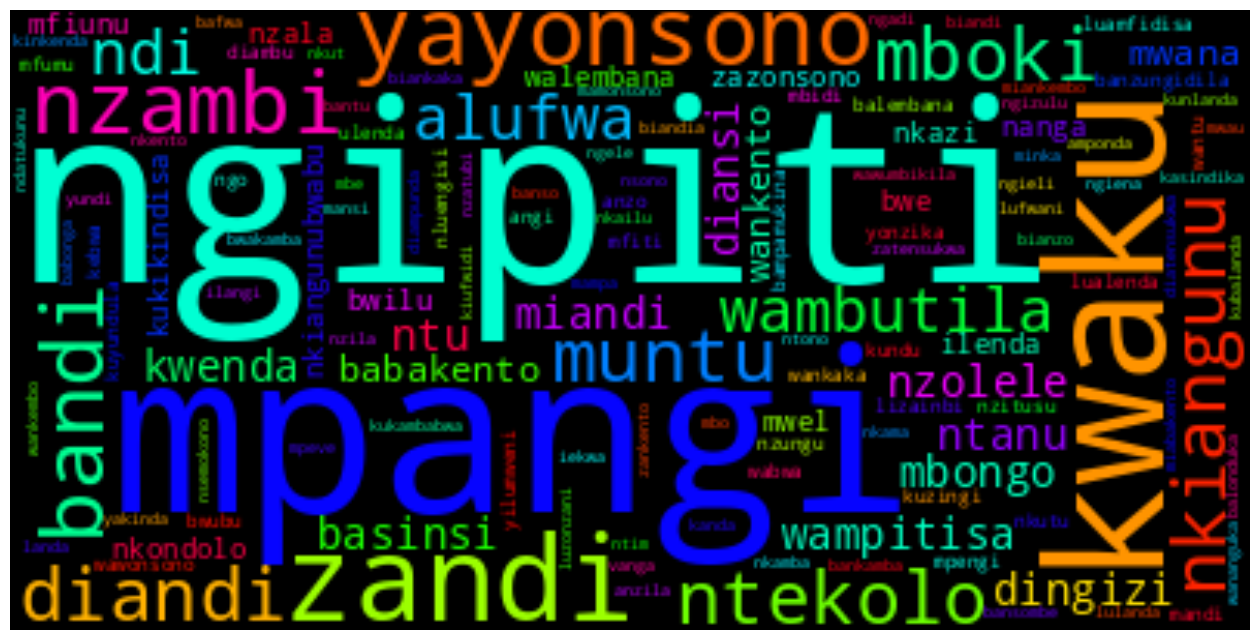

In [48]:
#Matthew word cloud
cloud = WordCloud(max_font_size=80,colormap="hsv").generate_from_frequencies(matthew_dict)
plt.figure(figsize=(16,12))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

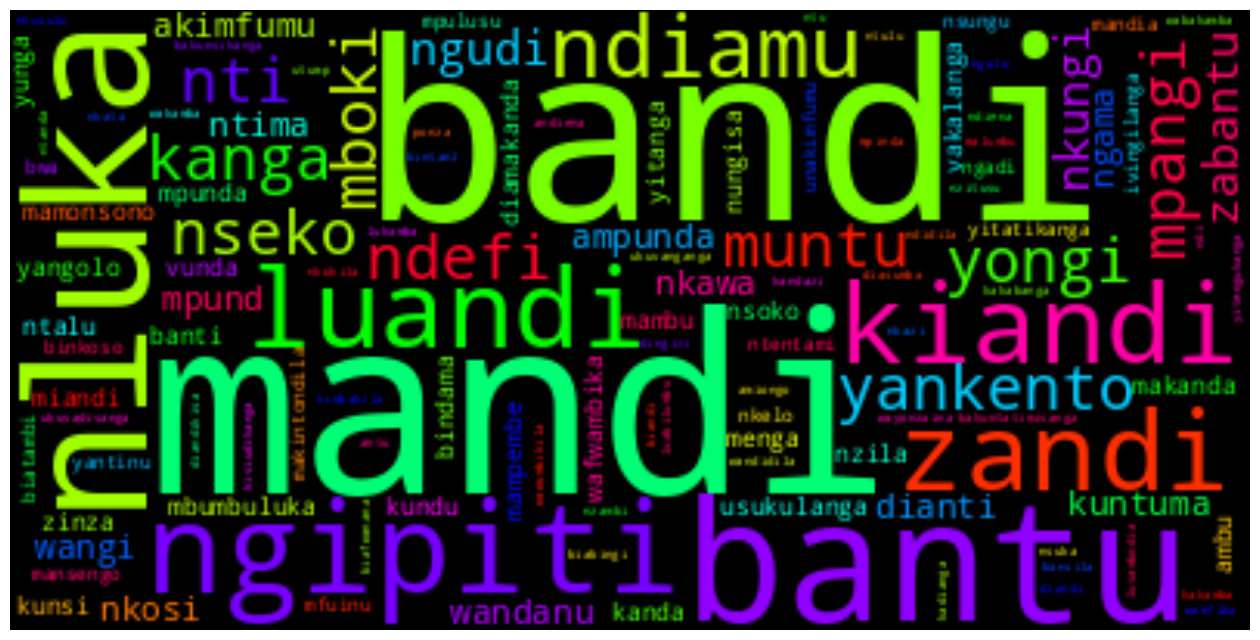

In [49]:
#John word cloud
cloud = WordCloud(max_font_size=80,colormap="hsv").generate_from_frequencies(john_dict)
plt.figure(figsize=(16,12))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Collocations 

### Entire corpus only.

In [50]:
#Bigrams
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures

bc = BigramCollocationFinder.from_words(c)

bc.nbest(BigramAssocMeasures.likelihood_ratio, 50)

[('mfumu', 'nzambi'),
 ('mwana', 'wankento'),
 ('nsamu', 'wambote'),
 ('bangudi', 'zabantu'),
 ('nkailu', 'angioka'),
 ('nkailu', 'andia'),
 ('muntu', 'muntu'),
 ('bantu', 'bandi'),
 ('mpangi', 'zandi'),
 ('nkailu', 'angiokolo'),
 ('nlonguki', 'miandi'),
 ('bangudi', 'zanganga'),
 ('umwan', 'amuntu'),
 ('ntinu', 'ntinu'),
 ('mwelo', 'anzo'),
 ('ngudi', 'anganga'),
 ('bundu', 'diadionsono'),
 ('nkombo', 'yambakala'),
 ('mbidi', 'akunku'),
 ('bakuluntu', 'banzo'),
 ('nkailu', 'miangioka'),
 ('ntuti', 'ankangu'),
 ('kanda', 'kanda'),
 ('ngombe', 'yambakala'),
 ('nkia', 'ngunu'),
 ('ngudi', 'antuti'),
 ('mbidi', 'antalu'),
 ('nkadi', 'ampemba'),
 ('sinsi', 'sinsi'),
 ('mavanga', 'mandi'),
 ('muntu', 'nkutu'),
 ('mbandu', 'mbandu'),
 ('ndumb', 'andambisa'),
 ('nkangu', 'wawonsono'),
 ('nseki', 'ankunga'),
 ('ngudi', 'zabantu'),
 ('mpeve', 'zambi'),
 ('nkama', 'sambanu'),
 ('nkondo', 'nsiku'),
 ('lusansu', 'luantinu'),
 ('wayenda', 'vundi'),
 ('vundi', 'mandi'),
 ('kanda', 'diabantu'),
 ('ma

In [51]:
#Trigrams
from nltk.collocations import TrigramCollocationFinder
from nltk.metrics import TrigramAssocMeasures
tc = TrigramCollocationFinder.from_words(c)
tc.nbest(TrigramAssocMeasures.likelihood_ratio, 50)

[('muntu', 'muntu', 'muntu'),
 ('mambu', 'mfumu', 'nzambi'),
 ('bwakamba', 'mfumu', 'nzambi'),
 ('mfumu', 'nzambi', 'zankaka'),
 ('nzambi', 'mfumu', 'nzambi'),
 ('vantadisi', 'mfumu', 'nzambi'),
 ('nkela', 'mfumu', 'nzambi'),
 ('nkumbu', 'mfumu', 'nzambi'),
 ('mambi', 'mfumu', 'nzambi'),
 ('nkailu', 'angioka', 'nkailu'),
 ('mfumu', 'mfumu', 'nzambi'),
 ('nding', 'mfumu', 'nzambi'),
 ('ntinu', 'ntinu', 'ntinu'),
 ('nkiangunu', 'mfumu', 'nzambi'),
 ('muntu', 'mfumu', 'nzambi'),
 ('ntumunu', 'mfumu', 'nzambi'),
 ('mfumu', 'nzambi', 'aminkangu'),
 ('mfumu', 'nzambi', 'mfumu'),
 ('mfumu', 'nzambi', 'mpungu'),
 ('nzitusu', 'mfumu', 'nzambi'),
 ('mfumu', 'nzambi', 'nzambi'),
 ('wasambila', 'mfumu', 'nzambi'),
 ('nkailu', 'andia', 'nkailu'),
 ('masonga', 'mfumu', 'nzambi'),
 ('nganzi', 'mfumu', 'nzambi'),
 ('mfumu', 'nzambi', 'lenda'),
 ('nkembo', 'mfumu', 'nzambi'),
 ('mfumu', 'nzambi', 'ngipiti'),
 ('vanta', 'mfumu', 'nzambi'),
 ('tungila', 'mfumu', 'nzambi'),
 ('mfumu', 'nzambi', 'ampulusu'

mfumu and nzambi (chief and God) occur a lot together, mwana and wankento(child and women/daughters/children depending on context) as well. 
muntu is the top trigram. muntu means person.

mambu, mfumu, and nzambi is the seconde most occuring trigram. There must have been a lot of talk of 'happy' 'chief' 'God'.

This is interesting, because I am also gaining insight into how this Swedish man understood Kituba.


# Cooccurence 

### Genesis only.

In [52]:
from collections import defaultdict



def create_matrix(corpus, threshold=1):
    """
        creates a cooccurrence matrix for the corpus
    """
    #create a set of unique words
    unique_words = set(corpus)
    
    #create a dictionary to hold the cooccurrence counts
    co_occurrence_matrix = defaultdict(lambda: defaultdict(int))
    
    #iterate through the corpus and count cooccurrences
    for i, word in enumerate(corpus):
        for j in range(i + 1, len(corpus)):
            if word != corpus[j]:
                co_occurrence_matrix[word][corpus[j]] += 1
                co_occurrence_matrix[corpus[j]][word] += 1
                
                
        #list of unique words
    unique_words = list(set(corpus))

#initializing the cooccurrence matrix
    co_matrix = np.zeros((len(unique_words), len(unique_words)), dtype=int)

#populating cooccurrence matrix
    word_index = {word: idx for idx, word in enumerate(unique_words)}
    for word, neighbors in co_occurrence_matrix.items():
        #Should I remove the threshold, and instead do the top N pairs?
        for neighbor, count in neighbors.items():
            if count>= threshold:       
                b, g = word_index[word], word_index[neighbor]
                co_matrix[b][g] = count
           

    #dataframe
    co_matrix_df = pd.DataFrame(co_matrix, index=unique_words, columns=unique_words)
    
########## THE NEXT FEW LINES I REALLY COULD IMPROVE UPON. A lot of trial and error, this was the best option I found to see the words with highest counts ###############################


    #remove words with zero cooccurrences
    co_matrix_df = co_matrix_df.loc[(co_matrix_df != 0).any(axis=1), (co_matrix_df != 0).any(axis=0)]
    
    #Make the most cooccurrences come first
    descending = co_matrix_df.sum(axis=1).sort_values(ascending=False)
    co_matrix_df = co_matrix_df.loc[descending.index, descending.index]
    
    
    #sort the df by the sum of each row
    co_matrix_df = co_matrix_df.loc[descending.index]
    
    
    #sort the df by the sum of each column
    co_matrix_df = co_matrix_df.loc[:, descending.index]
    
##################################################################################
    return co_matrix_df

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

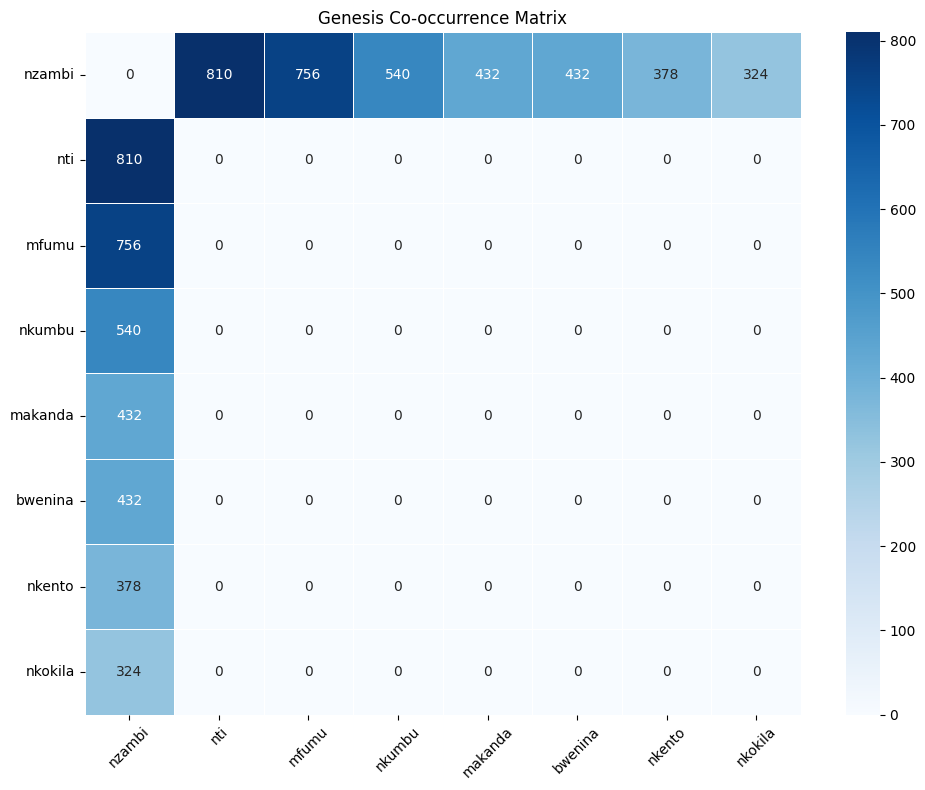

In [54]:
#visualising the matrix with colour coding
plt.figure(figsize=(10, 8))
sns.heatmap(create_matrix(genesis, threshold=300), annot=True, fmt="d", cmap="Blues", linewidths=.5)
plt.title("Genesis Co-occurrence Matrix")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Topic Modeling

In [55]:
import gensim
from gensim import matutils
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import (
    CoherenceModel)
from gensim import corpora
from gensim.corpora import Dictionary

from sklearn.feature_extraction.text import (
    CountVectorizer)

## Genesis only

In [56]:
#changing the format of each book of the bible to a pandas dataframe, and each row is 500 words
def create_dataframe(corpus, n):
    """
        creates a pandas dataframe for each book of the bible
    """
    df = pd.DataFrame({'text': [' '.join(corpus[i:i+n]) for i in range(0, len(corpus), n)]})
    return df


#creating a dataframe, each row is x words
genesis_df = create_dataframe(genesis, 500)



cv = CountVectorizer(min_df=.01)

document_term_matrix = cv.fit_transform(genesis_df['text'])

#changing to dataframe for easier reading
dtm_df = pd.DataFrame(document_term_matrix.toarray(), columns=cv.get_feature_names_out())

In [57]:
dtm_df

#setting up the dictionary and corpus for LDA

texts = genesis_df['text'].apply(lambda x: x.split()).tolist()
dictionary = Dictionary(texts)

corpus = [dictionary.doc2bow(text) for text in genesis_df['text'].apply(lambda x: x.split())]

#vocab = dict(enumerate(cv.get_feature_names_out())) #change to get_feature_names_out() for updated sklearn


#actual LDA model
lda = LdaModel(corpus, id2word=dictionary, num_topics=3,
               random_state=123, alpha="asymmetric")

#making into dataframe
pd.DataFrame({f"Topic {n}":[w for (w,tw) in words]
              for (n, words) in lda.show_topics(formatted=False)})

#want to view the weights of each word in the top 10
topic_words_weighted = pd.DataFrame({
    f"Topic {topic_id}": [f"{word} ({round(weight, 2)})" for word, weight in words]
    for topic_id, words in lda.show_topics(formatted=False)
})

print(topic_words_weighted) #so I can see the weights of each word in the top 10


                           Topic 0                              Topic 1  \
0     nzambi (0.07000000029802322)         nzambi (0.09000000357627869)   
1       nti (0.019999999552965164)           nti (0.029999999329447746)   
2     mfumu (0.019999999552965164)         mfumu (0.019999999552965164)   
3    nkumbu (0.019999999552965164)        nkumbu (0.019999999552965164)   
4   bwenina (0.009999999776482582)       makanda (0.019999999552965164)   
5   makanda (0.009999999776482582)       bwenina (0.009999999776482582)   
6     nsuka (0.009999999776482582)        nkento (0.009999999776482582)   
7  biambote (0.009999999776482582)       nkokila (0.009999999776482582)   
8    nkento (0.009999999776482582)  bizanzalanga (0.009999999776482582)   
9     muntu (0.009999999776482582)        nlangu (0.009999999776482582)   

                          Topic 2  
0    nzambi (0.07999999821186066)  
1      nti (0.019999999552965164)  
2    mfumu (0.019999999552965164)  
3   nkumbu (0.0099999997764825

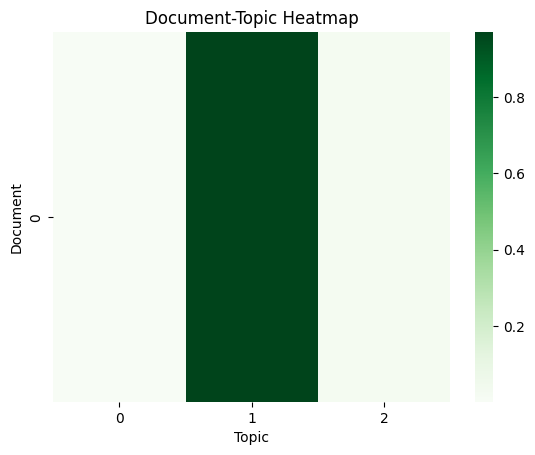

In [58]:
#creating document-topic matrix
topics = pd.DataFrame([
    dict(lda.get_document_topics(doc, minimum_probability=0.0))
    for doc in corpus
])


#viewing it
sns.heatmap(topics, cmap="Greens", cbar=True)
plt.xlabel("Topic")
plt.ylabel("Document")
plt.title("Document-Topic Heatmap")
plt.show()

In [59]:
#interactive visualisation
import pyLDAvis.gensim_models as gensimvis  #discrepancies between gensim and pyLDAvis. Downgraded to scikit-learn version 1.2.2 
import pyLDAvis

dictionary = corpora.Dictionary([[word] for word in cv.get_feature_names_out()])

# creating visualisation
vis_data = gensimvis.prepare(lda, corpus, dictionary)

#visualisation
pyLDAvis.display(vis_data)



/home/samantharose/Desktop/kikongo/venv/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=24564) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/home/samantharose/Desktop/kikongo/venv/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=24564) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/home/samantharose/Desktop/kikongo/venv/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=24564) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/home/samantharose/Desktop/kikongo/venv/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=24564) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/home/sa

In [60]:
#Finding Coherence Score for Genesis only
texts = genesis_df['text'].apply(lambda x: x.split()).tolist()


coherence_model = CoherenceModel(model=lda, texts=texts, dictionary=dictionary, coherence='c_v', topn=5) #model c_v 
coherence_score = coherence_model.get_coherence()


print(f'LDA Coherence Score: {coherence_score:.4f}')

/usr/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=24564) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/usr/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=24564) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/usr/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=24564) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/usr/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=24564) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/usr/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=24564) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/usr/lib/python3.12/multiprocessing/popen_for

LDA Coherence Score: 0.4089


/usr/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=24564) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()


In [61]:
perplexity = lda.log_perplexity(corpus)

print(f'Perplexity: {perplexity:.4f}')

Perplexity: -5.7733


Coherence score was okay, perplexity is just okay as well. Topic 1 is almost all of the book.

# Bigrams


### LDA with Genesis, but make it bigrams

In [62]:
from gensim.models import Phrases
from gensim.models.phrases import Phraser

#texts = tokenized documents
bigram = Phrases(texts, min_count=2, threshold=5)
bigram_mod = Phraser(bigram)

#apply bigram model
texts_bigrams = [bigram_mod[doc] for doc in texts]


In [63]:
dictionary = Dictionary(texts_bigrams)

corpus = [dictionary.doc2bow(text) for text in genesis_df['text'].apply(lambda x: x.split())]



#actual LDA model
lda = LdaModel(corpus, id2word=dictionary, num_topics=3,
               random_state=123, alpha="asymmetric")

#making into dataframe
pd.DataFrame({f"Topic {n}":[w for (w,tw) in words]
              for (n, words) in lda.show_topics(formatted=False)})

#checking weights again, this should be more interesting
topic_words_weighted = pd.DataFrame({
    f"Topic {topic_id}": [f"{word} ({round(weight, 2)})" for word, weight in words]
    for topic_id, words in lda.show_topics(formatted=False)
})

print(topic_words_weighted)


                               Topic 0                         Topic 1  \
0         nzambi (0.05000000074505806)    nzambi (0.07999999821186066)   
1           nti (0.019999999552965164)    mfumu (0.019999999552965164)   
2         mfumu (0.019999999552965164)      nti (0.019999999552965164)   
3       bwenina (0.009999999776482582)   nkumbu (0.019999999552965164)   
4        nkumbu (0.009999999776482582)  makanda (0.009999999776482582)   
5       makanda (0.009999999776482582)  bwenina (0.009999999776482582)   
6      biambote (0.009999999776482582)   nkento (0.009999999776482582)   
7  bizanzalanga (0.009999999776482582)  bwakala (0.009999999776482582)   
8        nkento (0.009999999776482582)    muntu (0.009999999776482582)   
9         nsono (0.009999999776482582)    nsono (0.009999999776482582)   

                          Topic 2  
0    nzambi (0.10000000149011612)  
1      nti (0.029999999329447746)  
2    mfumu (0.019999999552965164)  
3   nkumbu (0.019999999552965164)  
4  ma

In [64]:
# creating visualisation
vis_data = gensimvis.prepare(lda, corpus, dictionary)

# visualisation
pyLDAvis.display(vis_data)


In [65]:
texts = genesis_df['text'].apply(lambda x: x.split()).tolist()


coherence_model = CoherenceModel(model=lda, texts=texts, dictionary=dictionary, coherence='c_v', topn=5)
coherence_score = coherence_model.get_coherence()
print(f'LDA Coherence Score: {coherence_score:.4f}')

/usr/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=24564) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/usr/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=24564) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/usr/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=24564) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/usr/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=24564) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/usr/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=24564) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/usr/lib/python3.12/multiprocessing/popen_for

LDA Coherence Score: 0.3898


/usr/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=24564) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()


In [66]:
perplexity = lda.log_perplexity(corpus)

print(f'Perplexity: {perplexity:.4f}')

Perplexity: -5.6587


Not much of a change in topics and the coherence score and perplexity are both slightly worse.

# LDA on the top 5 books in the Bible.

In [67]:
#creating a dataframe for the whole corpus. one row per book!
#assuming each book is a list of tokens (words)
book_texts = {
    'Genesis': ' '.join(genesis),
    'Exodus': ' '.join(exodus),
    'Psalms': ' '.join(psalms),
    'Matthew': ' '.join(matthew),
    'John':    ' '.join(john)
}

#creating df that has 5 rows, each row is an entire book. better than slicing each book up
bible_df = pd.DataFrame({
    'book': ['Genesis', 'Exodus', 'Psalms', 'Matthew', 'John'],
    'text': [
        ' '.join(genesis),
        ' '.join(exodus),
        ' '.join(psalms),
        ' '.join(matthew),
        ' '.join(john)
    ]
})

# creating document-topic matrix
topics = pd.DataFrame([
    dict(lda.get_document_topics(doc, minimum_probability=0.0))
    for doc in corpus
])


In [68]:
#tokenising text column (per book)
texts = bible_df['text'].apply(lambda x: x.split()).tolist()

#dictionary and corpus
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# training lda model
lda = LdaModel(corpus=corpus,
               id2word=dictionary,
               num_topics=6,
               random_state=123,
               alpha='auto')

In [69]:
#top words for each topic
topic_words = pd.DataFrame({
    f"Topic {topic_id}": [word for word, _ in words]
    for topic_id, words in lda.show_topics(formatted=False)
})

# weighting them to show their importance
topic_words_weighted = pd.DataFrame({
    f"Topic {topic_id}": [f"{word} ({round(weight, 2)})" for word, weight in words]
    for topic_id, words in lda.show_topics(formatted=False)
})

print(topic_words_weighted)

                            Topic 0                           Topic 1  \
0     nzambi (0.019999999552965164)      nzambi (0.05999999865889549)   
1    ngipiti (0.009999999776482582)      mfumu (0.019999999552965164)   
2     mpangi (0.009999999776482582)     nkumbu (0.019999999552965164)   
3      mboki (0.009999999776482582)      mwana (0.019999999552965164)   
4     nkumbu (0.009999999776482582)      mboki (0.009999999776482582)   
5      mfumu (0.009999999776482582)    ngipiti (0.009999999776482582)   
6  babakento (0.009999999776482582)     mpangi (0.009999999776482582)   
7      mwana (0.009999999776482582)        nti (0.009999999776482582)   
8      bandi (0.009999999776482582)  babakento (0.009999999776482582)   
9  yayonsono (0.009999999776482582)  nkiangunu (0.009999999776482582)   

                          Topic 2                           Topic 3  \
0  ngipiti (0.009999999776482582)      nzambi (0.05000000074505806)   
1    mboki (0.009999999776482582)      mfumu (0.019999

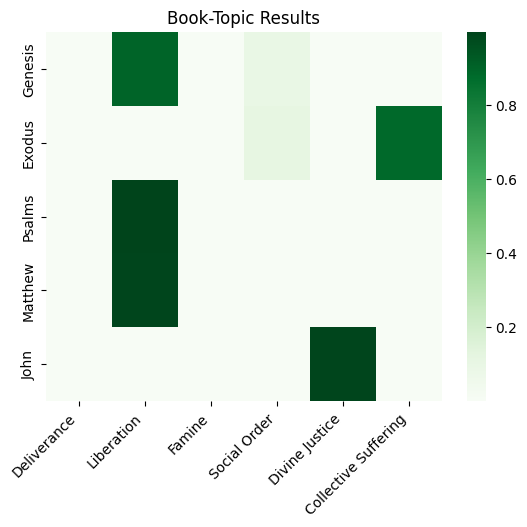

In [70]:
# creating document-topic matrix
topics = pd.DataFrame([
    dict(lda.get_document_topics(doc, minimum_probability=0.0))
    for doc in corpus
])
# viewing it
#setting labels for the heatmap first
ylabelsheatmap = ['Genesis', 'Exodus', 'Psalms', 'Matthew', 'John']
xlabelsheatmap = ['Deliverance','Liberation','Famine','Social Order','Divine Justice', 'Collective Suffering']
sns.heatmap(topics, cmap="Greens", cbar=True, xticklabels=xlabelsheatmap, yticklabels=ylabelsheatmap)
plt.title("Book-Topic Results")
plt.xticks(rotation=45, ha='right') 
plt.show()

I found topics by getting definitions for the top 10 words in each topic. 

I had a three step process for checking definitions:
1) consult my dictionary (un-comprehensive and can be innacurate because language is unstandardised and this Bible was written 120 years ago by a foreigner)
2) consult google translate & online dictionaries (again can be innaccurate for aforementioned reasons)
3) ask a native speaker about the meanings (par exemple, 'Ngipiti' means Egypt and wasn't found in any translations or dictionaries. Only a native speaker who grew up in the church would know that)

/tmp/ipykernel_24564/2149969616.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weights, y=word_labels, palette="YlGnBu")


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

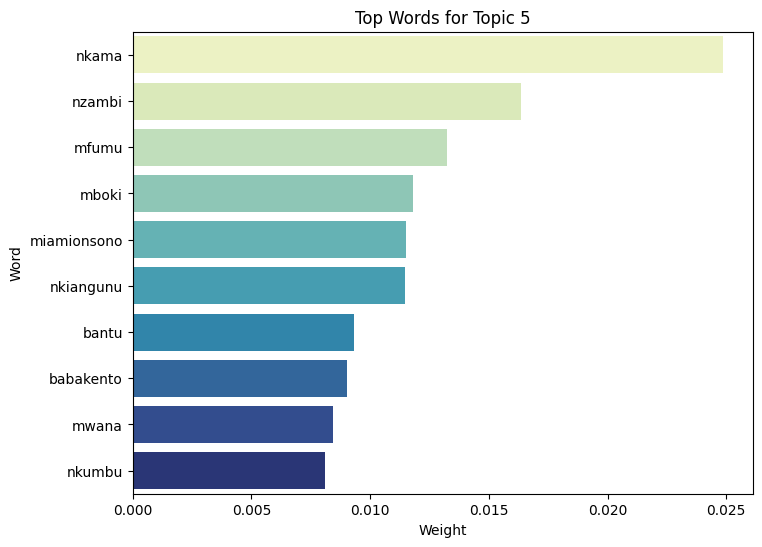

In [71]:
# Get topic X words and weights. Change topic_id to get different topics


# Change this to the topic you want to visualise. Numbered 0 through 5 
topic_id = 5

words = lda.show_topics(formatted=False)[topic_id][1]  # returns list of (word, weight)

#separate the words and the weights
word_labels = [w for w, _ in words]
weights = [wgt for _, wgt in words]

#plotting the top words for topic X
plt.figure(figsize=(8, 6))
sns.barplot(x=weights, y=word_labels, palette="YlGnBu")
plt.title(f"Top Words for Topic {topic_id}")
plt.xlabel("Weight")
plt.ylabel("Word")
plt.tight_layout

In [72]:
# creating visualisation
vis_data = gensimvis.prepare(lda, corpus, dictionary)

#visualisation
pyLDAvis.display(vis_data)


In [73]:
texts = bible_df['text'].apply(lambda x: x.split()).tolist()

#finding coherence score
coherence_model = CoherenceModel(model=lda, texts=texts, dictionary=dictionary, coherence='c_v', topn=5)
coherence_score = coherence_model.get_coherence()
print(f'LDA Coherence Score: {coherence_score:.4f}')

/usr/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=24564) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/usr/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=24564) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/usr/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=24564) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/usr/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=24564) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/usr/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=24564) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/usr/lib/python3.12/multiprocessing/popen_for

LDA Coherence Score: 0.5034


/usr/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=24564) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()


In [74]:
perplexity = lda.log_perplexity(corpus)

print(f'Perplexity: {perplexity:.4f}')

Perplexity: -7.2068


This by far is the best model, and even then it is still just alright. Coherence score is 0.5034 and perplexity is -7.2068. I rounded to 4 decimals for all scores. This definitely could be improved upon, particularly if I could have created better preprocessing methods.